In [ ]:
# import csv

# # 假设 .data 文件是以逗号分隔的文本文件
# input_file = 'kddcup.data'
# output_file = 'kddcup.csv'

# with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
#     reader = csv.reader(infile)
#     writer = csv.writer(outfile)
    
#     for row in reader:
#         writer.writerow(row)

# print(f"文件已成功转换为 {output_file}")

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [3]:
df = pd.read_csv('kddcup.csv', names=names)

In [ ]:
df.head()

In [ ]:
df.describe()

# Removal of redundant features

In [4]:
df['num_outbound_cmds'].value_counts()
df.drop('num_outbound_cmds', axis=1, inplace=True)
df['is_host_login'].value_counts()
df.drop('is_host_login', axis=1, inplace=True)

# Transformation of categorical features

In [5]:
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

# Removal of duplicates

In [6]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [ ]:
df.shape

In [ ]:
len(df['label'].value_counts())

In [7]:
df['label'].value_counts()

label
normal.             812814
neptune.            242149
satan.                5019
ipsweep.              3723
portsweep.            3564
smurf.                3007
nmap.                 1554
back.                  968
teardrop.              918
warezclient.           893
pod.                   206
guess_passwd.           53
buffer_overflow.        30
warezmaster.            20
land.                   19
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

y=df.iloc[:, -1]

# 找出所有unique的标签
unique_labels = set(y)

# 自定义编码，normal和benign为0，其余使用LabelEncoder
custom_mapping = {label: 0 for label in unique_labels if label.lower() in ['normal', 'normal.', 'benign']}

# 剩余的标签使用LabelEncoder进行编码
remaining_labels = [label for label in unique_labels if label not in custom_mapping]
le = LabelEncoder()
le.fit(remaining_labels)

for label in remaining_labels:
    custom_mapping[label] = le.transform([label])[0] + 1  # 确保编码不与0冲突

# 将编码和标签的对应关系按编码值进行排序
sorted_mapping = sorted(custom_mapping.items(), key=lambda item: item[1])

# 记录编码和标签的对应关系到log中
with open('log.txt', 'a') as log_file:
    log_file.write("Label Encoding:\n")
    for label, code in sorted_mapping:
        log_file.write(f"{label} : {code}\n")
    log_file.write("\n")
    
y_encoded = [custom_mapping[label] for label in y]
df['label'] = y_encoded

In [9]:
df['label'].value_counts()

label
0     812814
10    242149
17      5019
6       3723
15      3564
18      3007
11      1554
1        968
20       918
21       893
14       206
4         53
2         30
22        20
7         19
5         12
16        10
8          9
3          8
9          7
13         4
12         3
19         2
Name: count, dtype: int64

# Log-scaled distribution of attacks

<Figure size 640x480 with 0 Axes>

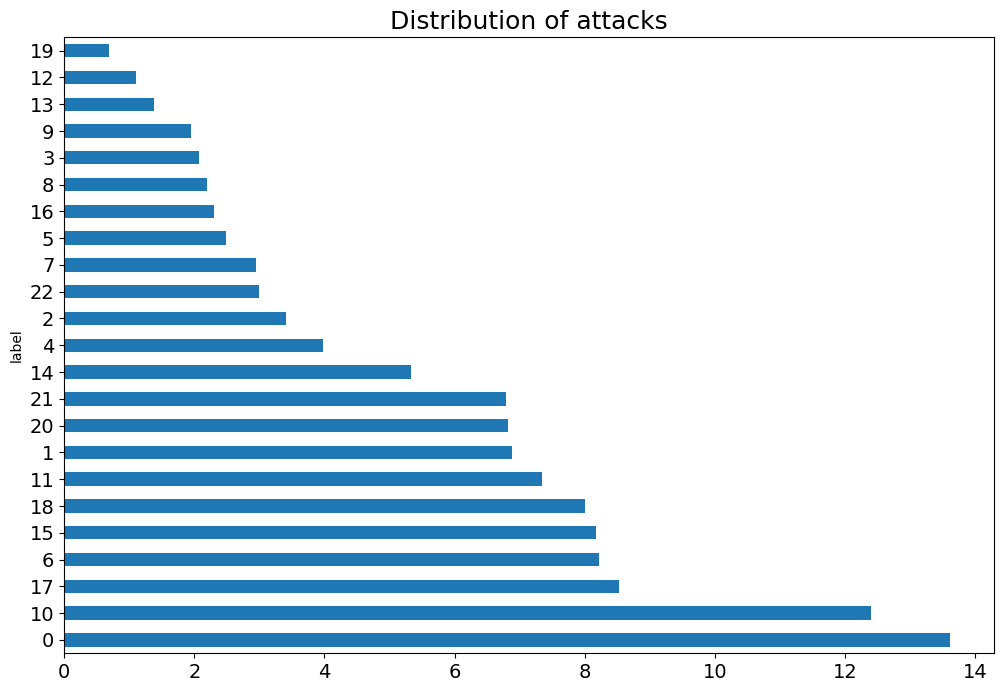

In [10]:
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')
#df.plot(kind='barh')
df['label'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

# Univariate histogramms

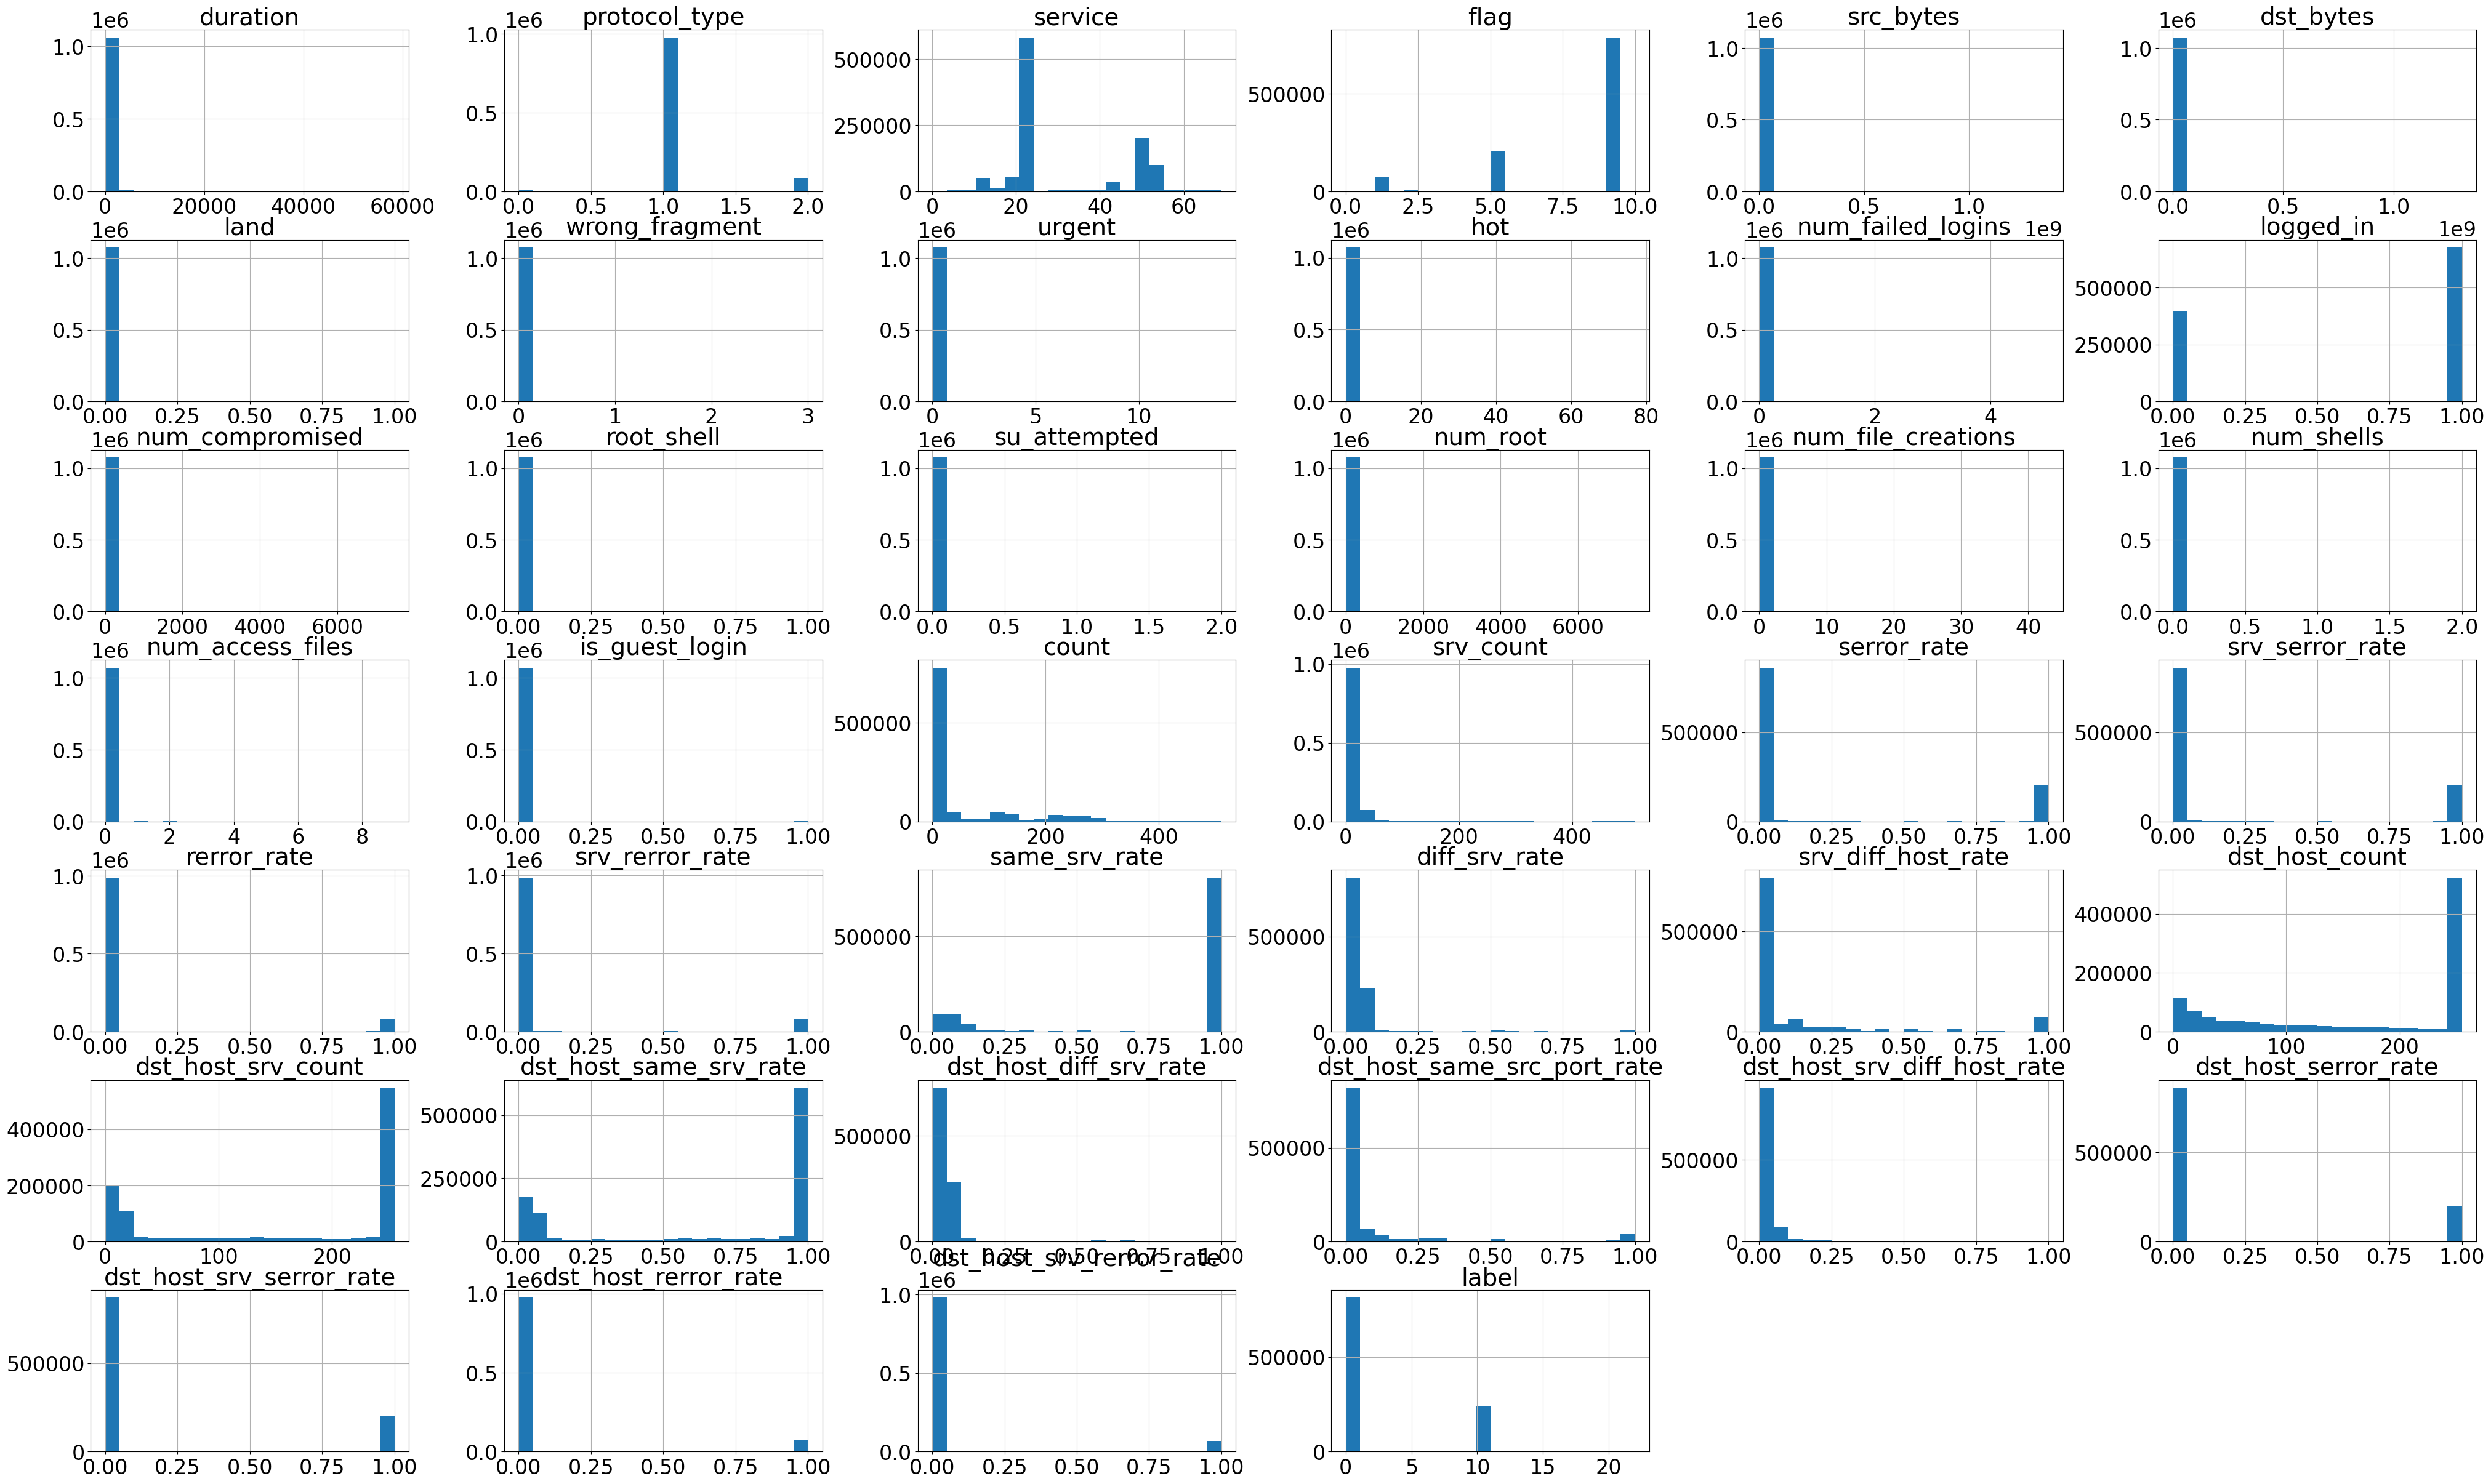

In [11]:
import matplotlib.pyplot as plt
import matplotlib
params = {'axes.titlesize':'28',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
df.hist(figsize=(50, 30), bins=20)
plt.show()

# KDD standardization

In [12]:
df.shape

(1074992, 40)

In [13]:
data = df.values

In [14]:
X = data[:, 0:39]

In [15]:
X

array([[0.0e+00, 1.0e+00, 2.4e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 1.0e+00, 2.4e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [0.0e+00, 1.0e+00, 2.4e+01, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       ...,
       [0.0e+00, 1.0e+00, 2.4e+01, ..., 1.0e-02, 0.0e+00, 0.0e+00],
       [0.0e+00, 1.0e+00, 2.4e+01, ..., 1.0e-02, 0.0e+00, 0.0e+00],
       [0.0e+00, 1.0e+00, 2.4e+01, ..., 1.0e-02, 0.0e+00, 0.0e+00]])

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sScaler = StandardScaler()
rescaleX = sScaler.fit_transform(X)

In [18]:
rescaleX

array([[-0.10206597, -0.23155107, -0.56852895, ..., -0.48583298,
        -0.30336071, -0.30000562],
       [-0.10206597, -0.23155107, -0.56852895, ..., -0.48583298,
        -0.30336071, -0.30000562],
       [-0.10206597, -0.23155107, -0.56852895, ..., -0.48583298,
        -0.30336071, -0.30000562],
       ...,
       [-0.10206597, -0.23155107, -0.56852895, ..., -0.46028025,
        -0.30336071, -0.30000562],
       [-0.10206597, -0.23155107, -0.56852895, ..., -0.46028025,
        -0.30336071, -0.30000562],
       [-0.10206597, -0.23155107, -0.56852895, ..., -0.46028025,
        -0.30336071, -0.30000562]])

In [19]:
names_inputed = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files",
    "is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]

In [20]:
df_rescaled = pd.DataFrame(data=rescaleX, columns=names_inputed)

In [30]:
df_rescaled.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,...,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06
mean,-4.833049e-17,-1.554613e-16,-8.587386e-17,-3.418033e-16,2.569540e-19,-1.178704e-18,-3.539521e-18,-9.993941e-18,3.453594e-19,-4.534288e-18,...,3.189601e-16,3.451875e-16,-1.040427e-15,-4.124483e-17,2.585734e-17,-3.849518e-17,-6.620325e-17,2.316056e-16,1.114668e-16,1.982925e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.020660e-01,-3.658346e+00,-2.313497e+00,-3.125757e+00,-2.904804e-03,-3.539729e-03,-4.918009e-03,-3.096243e-02,-2.355554e-03,-5.441762e-02,...,-1.583857e+00,-1.448882e+00,-1.573170e+00,-3.776235e-01,-4.062047e-01,-3.856430e-01,-4.879134e-01,-4.858330e-01,-3.033607e-01,-3.000056e-01
25%,-1.020660e-01,-2.315511e-01,-5.685290e-01,-1.077983e+00,-2.904804e-03,-3.539729e-03,-4.918009e-03,-3.096243e-02,-2.355554e-03,-5.441762e-02,...,-1.094929e+00,-1.285073e+00,-1.408832e+00,-3.776235e-01,-4.062047e-01,-3.856430e-01,-4.879134e-01,-4.858330e-01,-3.033607e-01,-3.000056e-01
50%,-1.020660e-01,-2.315511e-01,-5.685290e-01,5.602362e-01,-2.795828e-03,-3.298601e-03,-4.918009e-03,-3.096243e-02,-2.355554e-03,-5.441762e-02,...,6.065416e-01,8.080409e-01,7.745145e-01,-3.776235e-01,-3.626941e-01,-3.856430e-01,-4.879134e-01,-4.858330e-01,-3.033607e-01,-3.000056e-01
75%,-1.020660e-01,-2.315511e-01,1.249146e+00,5.602362e-01,-2.752536e-03,-2.289788e-03,-4.918009e-03,-3.096243e-02,-2.355554e-03,-5.441762e-02,...,9.096772e-01,8.717443e-01,7.745145e-01,8.011197e-02,-2.321623e-01,-3.080071e-02,-4.879134e-01,-4.858330e-01,-3.033607e-01,-3.000056e-01
max,4.403293e+01,3.195244e+00,2.703286e+00,9.697910e-01,6.866775e+02,9.513875e+02,2.033343e+02,3.392112e+01,9.089932e+02,7.714156e+01,...,9.096772e-01,8.717443e-01,7.745145e-01,7.251301e+00,3.944856e+00,1.735647e+01,2.071190e+00,2.069440e+00,3.510531e+00,3.531649e+00


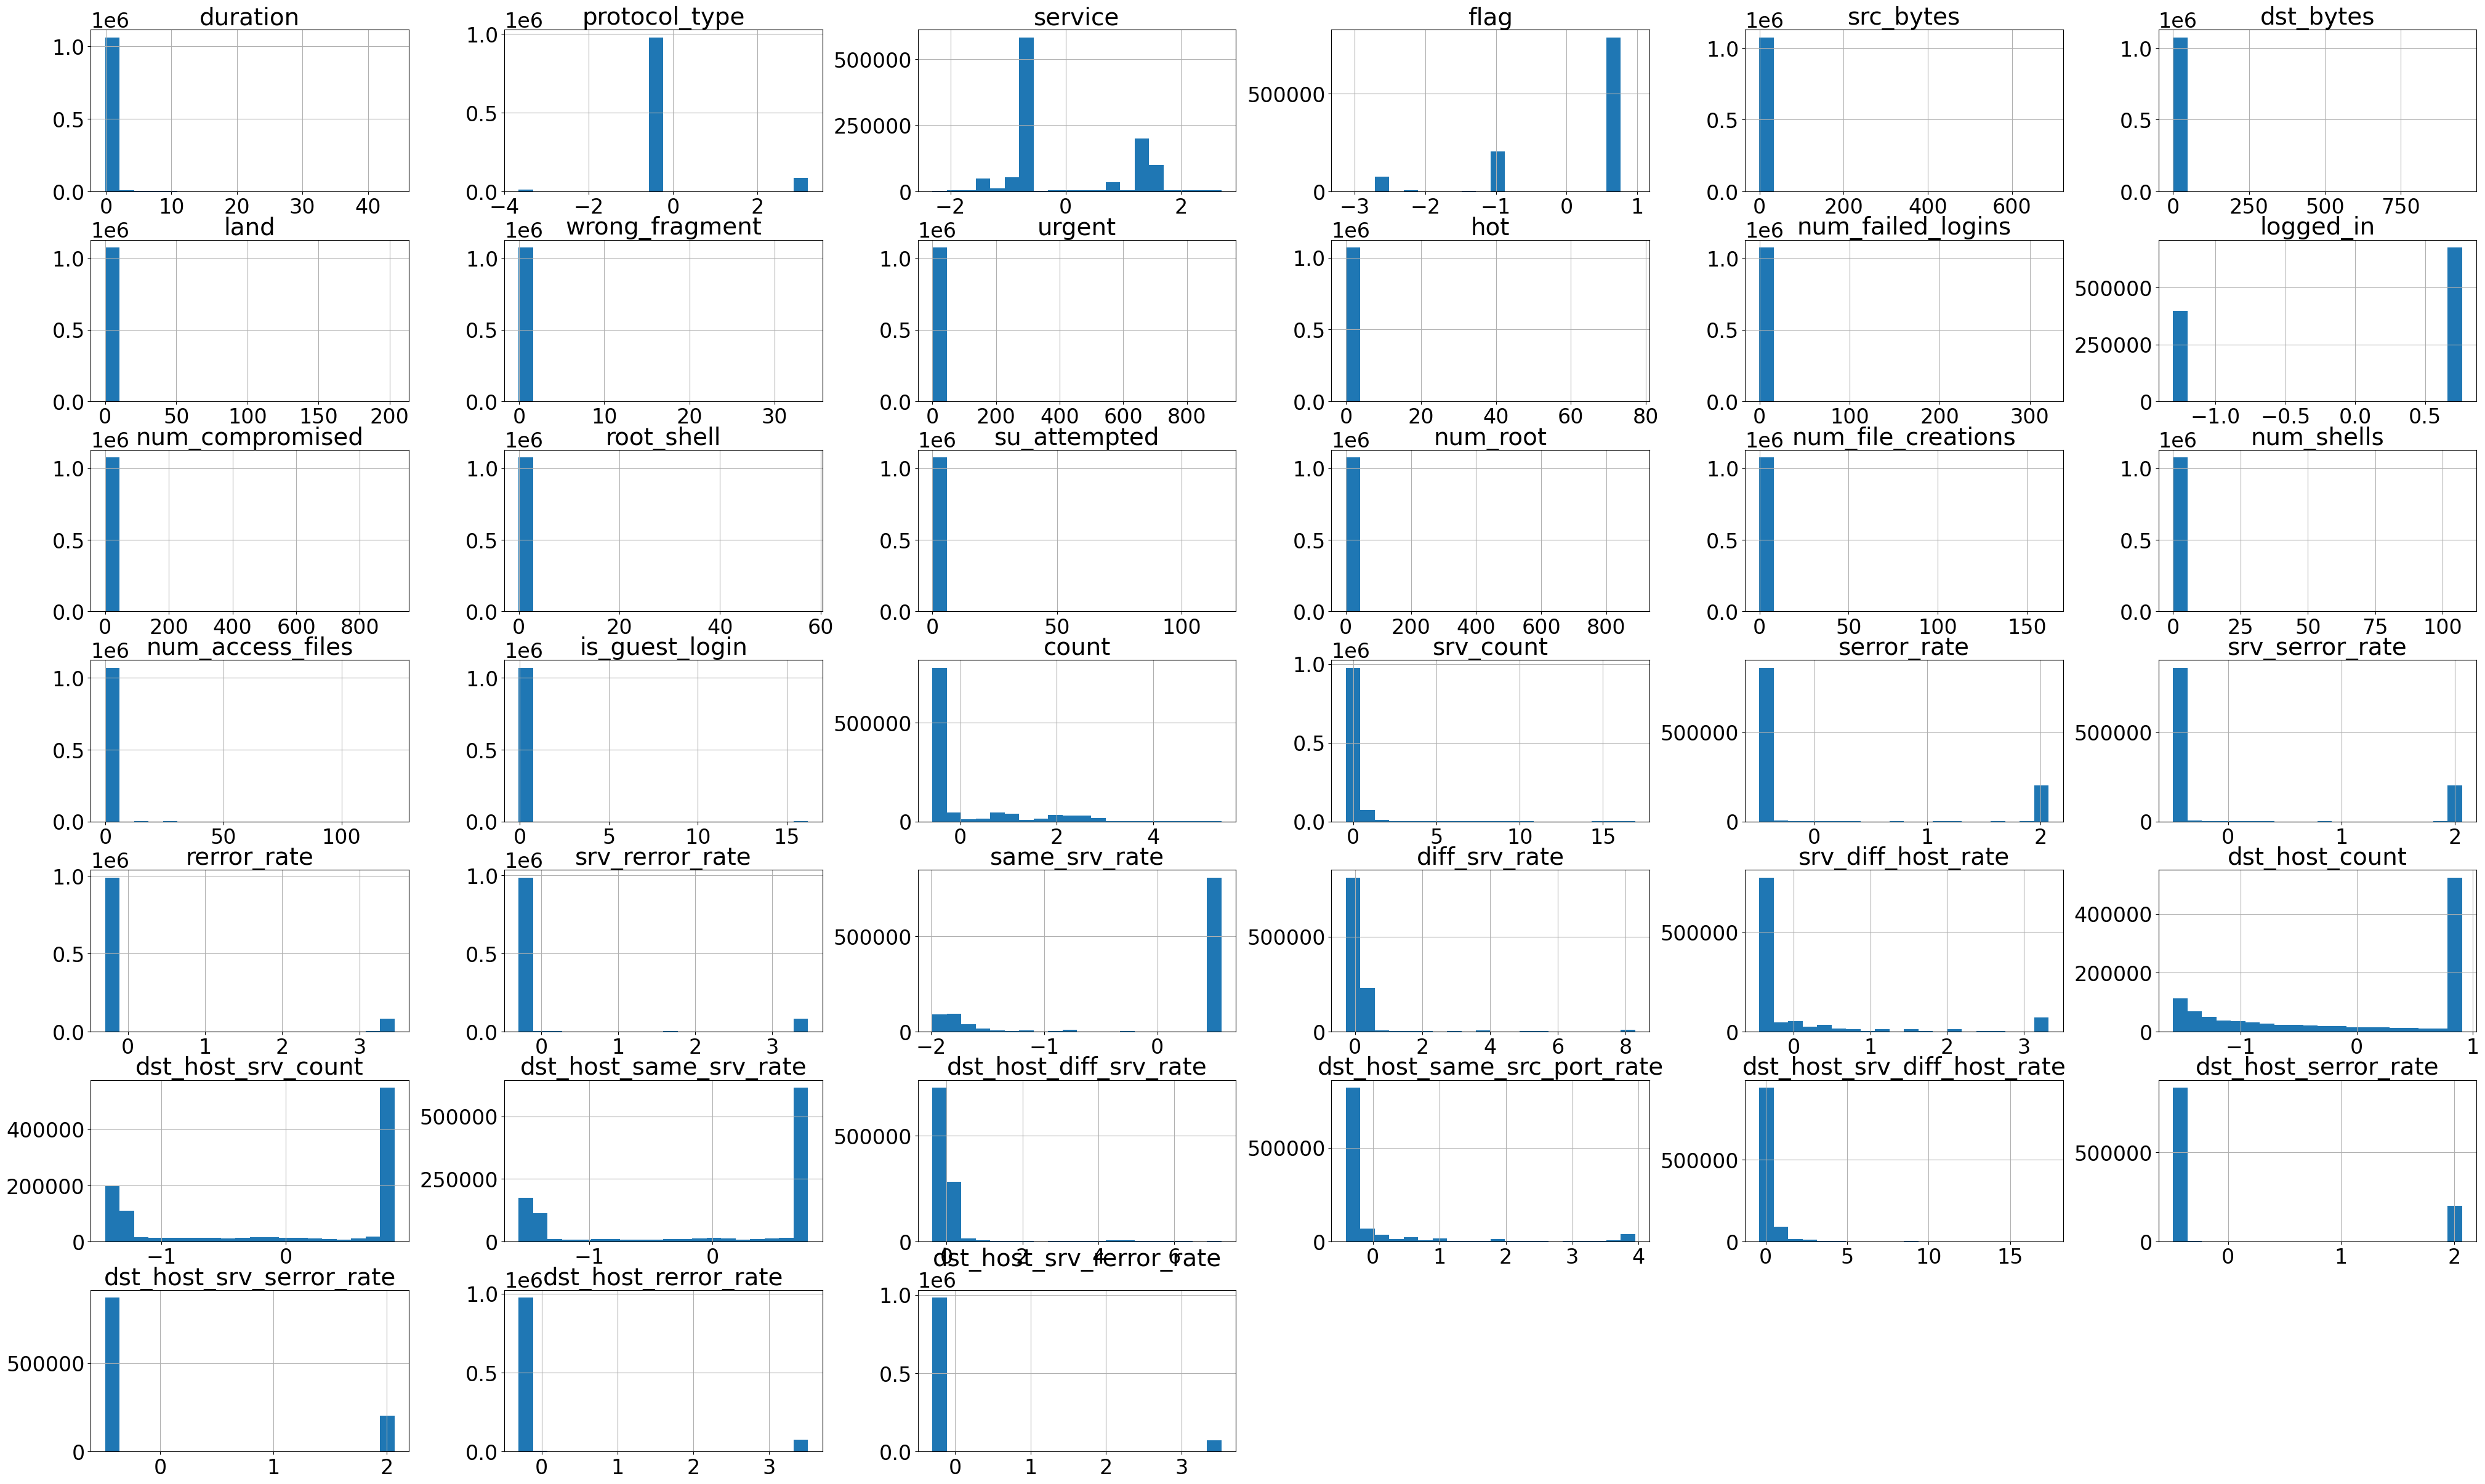

In [21]:
df_rescaled.hist(figsize=(50, 30), bins=20)
plt.show()

# KDD normalization

In [22]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()

In [23]:
xNormalize = norm.fit_transform(X)

In [26]:
xNormalize

array([[0.00000000e+00, 2.21844987e-05, 5.32427968e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.20703235e-04, 5.29687763e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.99526501e-04, 1.91886360e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.75800254e-04, 6.61920610e-03, ...,
        2.75800254e-06, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.81416934e-04, 1.87540064e-02, ...,
        7.81416934e-06, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.70618489e-04, 2.08948437e-02, ...,
        8.70618489e-06, 0.00000000e+00, 0.00000000e+00]])

In [28]:
df_Normalized = pd.DataFrame(data=xNormalize, columns=names_inputed)

In [29]:
df_Normalized.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,...,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06,1.074992e+06
mean,2.287745e-02,2.076842e-03,6.226204e-02,1.173329e-02,2.429958e-01,4.994812e-01,1.130371e-06,9.991373e-06,1.249830e-08,2.535835e-05,...,3.097844e-01,1.864040e-01,9.675005e-04,1.171846e-04,2.593007e-04,9.456002e-05,6.059850e-04,6.047352e-04,3.678141e-04,3.617147e-04
std,1.449704e-01,3.055571e-03,7.572981e-02,1.666193e-02,3.135124e-01,4.332291e-01,2.349807e-04,3.537927e-04,9.110404e-06,3.987508e-04,...,3.333755e-01,2.319355e-01,2.186847e-03,5.638994e-04,1.536633e-03,8.180599e-04,1.301702e-03,1.294998e-03,1.819659e-03,1.826317e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.219711e-04,1.108774e-02,3.442548e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.498909e-02,3.038910e-02,1.310847e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.190672e-03,3.338426e-02,8.316698e-03,1.056390e-01,5.282784e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.341671e-01,8.338017e-02,3.685900e-04,0.000000e+00,2.313436e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,2.969844e-03,1.001927e-01,1.584272e-02,3.679045e-01,9.740393e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.688376e-01,2.571310e-01,1.099945e-03,1.672713e-04,2.925414e-05,1.307236e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9.999982e-01,8.728716e-02,9.979905e-01,4.824506e-01,1.000000e+00,1.000000e+00,5.227084e-02,3.203840e-02,9.106349e-03,3.943423e-02,...,9.999222e-01,9.973405e-01,5.360563e-02,5.305822e-02,5.360563e-02,5.204029e-02,5.227084e-02,5.227084e-02,4.920678e-02,4.920678e-02


In [ ]:
df_Normalized.hist(figsize=(50, 30), bins=20)
plt.show()

# Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
df['label'] = df['label'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
data = df.values

In [ ]:
Y = data[:,39]

In [ ]:
X = data[:,0:39]

In [ ]:
Y

In [ ]:
X

In [ ]:
X = np.transpose(X)

In [ ]:
X

In [ ]:
df.shape

In [ ]:
df['label'].value_counts()

In [ ]:
df_preprocessed = pd.read_csv('kddcup99_preprocessed.csv')

In [ ]:
df_preprocessed['label'].value_counts()